In [2]:
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
def replace_nan_in_nc(input_file, output_file, nan_value=-9999, fill_value=0):
    # Open the NetCDF file using xarray with the netcdf4 engine
    ds = xr.open_dataset(input_file, engine='netcdf4')
    
    # Replace NaN values represented by nan_value with fill_value
    ds = ds.where(ds != nan_value, fill_value)
    
    # Save the modified dataset to a new NetCDF file
    ds.to_netcdf(output_file, engine='netcdf4')

# Example usage
input_file = 'chirps20GlobalDailyP05_7cb1_504f_7b72.nc'
output_file = 'output_rainfall_corrected.nc'
replace_nan_in_nc(input_file, output_file, nan_value=-9999, fill_value=0)

In [9]:
# Replace 'path_to_your_file.nc' with the actual path to your NetCDF file
path_to_file = 'output_rainfall_corrected.nc'

# Open the NetCDF file as an xarray dataset
ds = xr.open_dataset(path_to_file)

# Now you can work with the xarray dataset 'ds'
ds

<xarray.Dataset>
Dimensions:    (time: 15826, latitude: 85, longitude: 76)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2024-04-30
  * latitude   (latitude) float32 36.57 36.62 36.67 36.72 ... 40.67 40.72 40.77
  * longitude  (longitude) float32 8.575 8.625 8.675 8.725 ... 12.22 12.27 12.32
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes: (12/31)
    acknowledgements:          The Climate Hazards Group InfraRed Precipitati...
    cdm_data_type:             Grid
    Conventions:               CF-1.6, COARDS, ACDD-1.3
    creator_email:             pete@geog.ucsb.edu
    creator_name:              Pete Peterson
    creator_type:              person
    ...                        ...
    summary:                   This dataset has 1-day (daily) averages of the...
    time_coverage_end:         2024-04-30T00:00:00Z
    time_coverage_start:       1981-01-01T00:00:00Z
    title:                     CHIRPS Version 2.0, Precipitation, Global, 0.0...
    version:                   2.0
    Westernmost_Easting:       8.574997

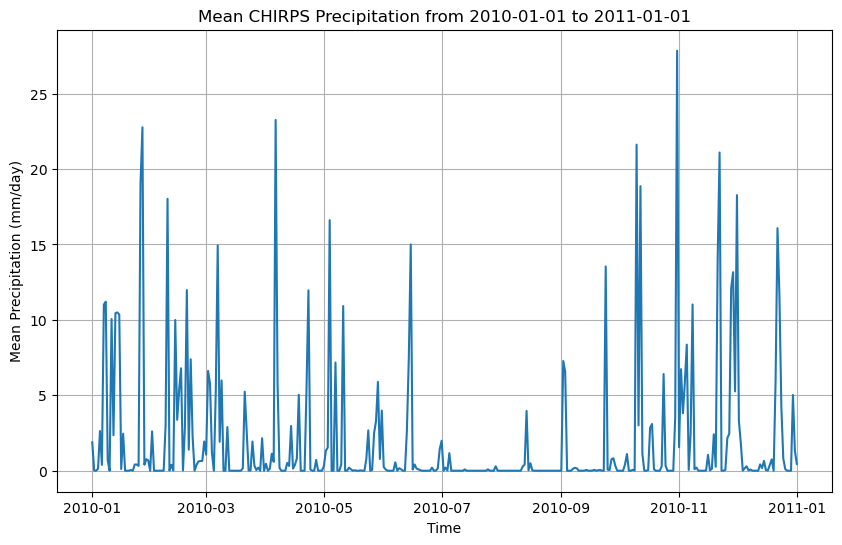

In [17]:
# Load CHIRPS data into an xarray dataset (replace 'path_to_your_chirps_file.nc' with your file path)
ds = xr.open_dataset('output_rainfall_corrected.nc')

# Specify the time range you want to plot (replace 'start_date' and 'end_date' with your desired dates)
start_date = '2010-01-01'
end_date = '2011-01-01'

# Select data within the specified time range
data_for_range = ds.sel(time=slice(start_date, end_date))

# Calculate the mean precipitation across all latitudes and longitudes
mean_precipitation = data_for_range['precip'].mean(dim=('latitude', 'longitude'))

# Extract the time dimension
time_data = data_for_range['time']

# Plot mean precipitation against time using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(time_data, mean_precipitation)
plt.title(f'Mean CHIRPS Precipitation from {start_date} to {end_date}')
plt.xlabel('Time')
plt.ylabel('Mean Precipitation (mm/day)')
plt.grid(True)
plt.show()

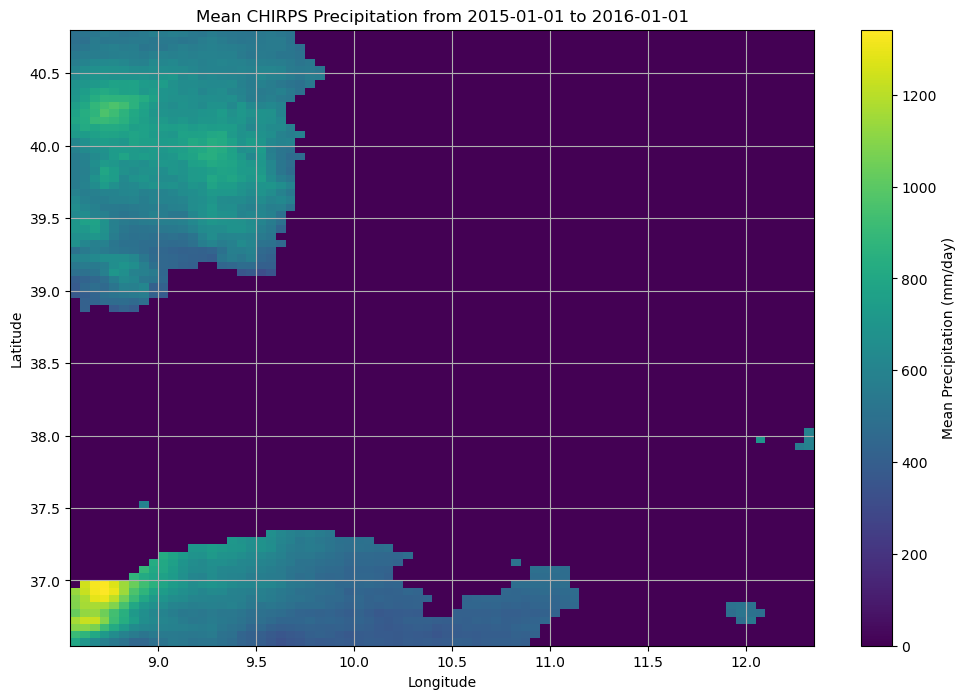

In [6]:
# Load CHIRPS data into an xarray dataset (replace 'path_to_your_chirps_file.nc' with your file path)
ds = xr.open_dataset('output_rainfall_corrected.nc')

# Specify the time range you want to plot (replace 'start_date' and 'end_date' with your desired dates)
start_date = '2015-01-01'
end_date = '2016-01-01'

# Select data within the specified time range
data_for_range = ds.sel(time=slice(start_date, end_date))

# Calculate the mean precipitation over time for each latitude and longitude
mean_precipitation_spatial = data_for_range['precip'].sum(dim='time')

# Get the latitude and longitude data
latitudes = mean_precipitation_spatial['latitude']
longitudes = mean_precipitation_spatial['longitude']

# Plotting the mean precipitation as a raster plot
plt.figure(figsize=(12, 8))
plt.pcolormesh(longitudes, latitudes, mean_precipitation_spatial, shading='auto', cmap='viridis')
plt.colorbar(label='Mean Precipitation (mm/day)')
plt.title(f'Mean CHIRPS Precipitation from {start_date} to {end_date}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [11]:
import geopandas as gpd

# Load the shapefile
shapefile_path = 'C:/Users/gaurav.fouzdar/Desktop/BN_Beshilo/Input files/BN_Beshilo.shp'
gdf = gpd.read_file(shapefile_path)

In [24]:
import xarray as xr
import rioxarray

# Load the NetCDF file
netcdf_path = r'C:\Users\gaurav.fouzdar\Downloads\chirps20GlobalDailyP05_cec6_67c7_e2c3.nc'
ds = xr.open_dataset(netcdf_path)

# Assume the rainfall data is in a variable named 'rainfall'
rainfall = ds['precip']

# Set the CRS of the NetCDF data
rainfall = rainfall.rio.write_crs("EPSG:4326") 

In [25]:
import json

# Get the geometry in GeoJSON format
geoms = gdf.geometry.values
geoms_json = [json.loads(gdf.to_json())['features'][0]['geometry']]

In [26]:
# Clip the rainfall data using the shapefile
clipped_rainfall = rainfall.rio.clip(gdf.geometry, gdf.crs)

In [30]:
# Save the clipped data to a new NetCDF file
clipped_netcdf_path = 'clipped_rainfall.nc'
clipped_rainfall.to_netcdf(clipped_netcdf_path)

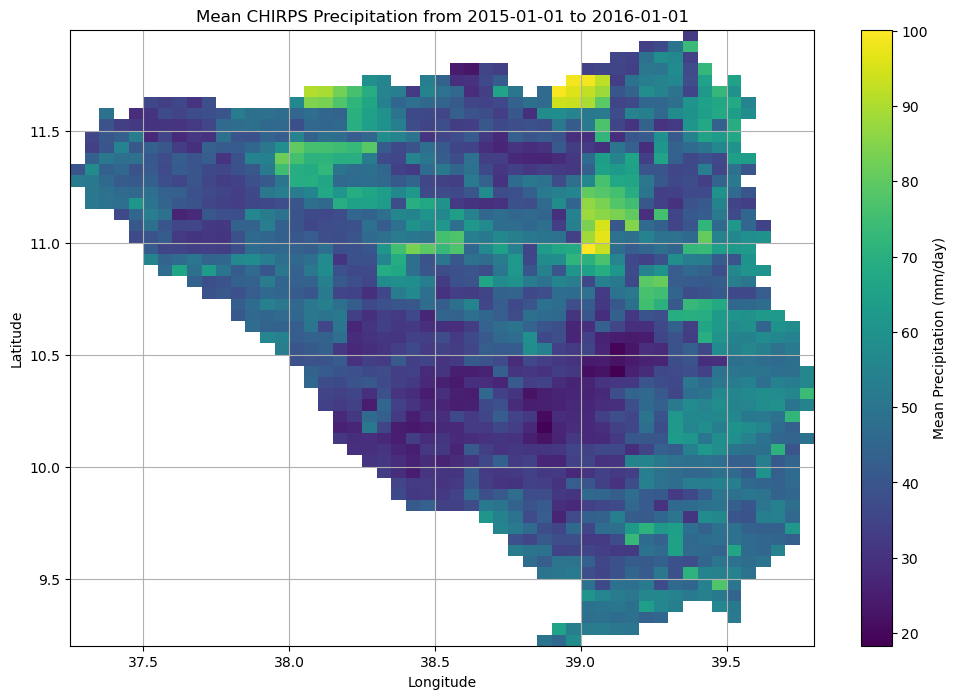

In [33]:
# Load CHIRPS data into an xarray dataset (replace 'path_to_your_chirps_file.nc' with your file path)
ds = xr.open_dataset('clipped_rainfall.nc')

# Specify the time range you want to plot (replace 'start_date' and 'end_date' with your desired dates)
start_date = '2015-01-01'
end_date = '2016-01-01'

# Select data within the specified time range
data_for_range = ds.sel(time=slice(start_date, end_date))

# Calculate the mean precipitation over time for each latitude and longitude
mean_precipitation_spatial = data_for_range['precip'].max(dim='time')

# Get the latitude and longitude data
latitudes = mean_precipitation_spatial['latitude']
longitudes = mean_precipitation_spatial['longitude']

# Plotting the mean precipitation as a raster plot
plt.figure(figsize=(12, 8))
plt.pcolormesh(longitudes, latitudes, mean_precipitation_spatial, shading='auto', cmap='viridis')
plt.colorbar(label='Mean Precipitation (mm/day)')
plt.title(f'Mean CHIRPS Precipitation from {start_date} to {end_date}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()